In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/iot_telemetry_data.csv')

In [7]:
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [8]:
# convert the boolean columns to int32 for plotting
data['light_int'] = data['light'].astype('int32')
data['motion_int'] = data['motion'].astype('int32')

In [9]:
# convert unix time to time of day
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)  # Unix epoch start time
data['datetime'] = data.ts.apply(lambda x: start + timedelta(seconds=x))
data['string_time'] = data.datetime.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [364]:
data.head()

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp
0,3,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,2020-07-12 00:01:34.385974,2020-07-12 00:01:34,2020-07-12 00:01:34.385974407
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570
2,3,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,2020-07-12 00:01:38.073573,2020-07-12 00:01:38,2020-07-12 00:01:38.073572636
3,2,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1,0,2020-07-12 00:01:39.589146,2020-07-12 00:01:39,2020-07-12 00:01:39.589146137
4,3,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,2020-07-12 00:01:41.761235,2020-07-12 00:01:41,2020-07-12 00:01:41.761234999


In [11]:
data1=data
data1.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)
data1['time_stamp'] = pd.to_datetime(data1['ts'],unit='s')
data1.drop(columns=['ts'], inplace=True)



In [12]:
df_1 = data1[data1.device == 1]
df_2 = data1[data1.device == 2]
df_3 = data1[data1.device == 3]

In [13]:
df_1.head()

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570
7,1,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:01:46.869076,2020-07-12 00:01:46,2020-07-12 00:01:46.869076014
15,1,0.002905,75.800003,False,0.005199,False,0.013509,19.700001,0,0,2020-07-12 00:02:02.785732,2020-07-12 00:02:02,2020-07-12 00:02:02.785731792
20,1,0.002938,75.800003,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:02:11.476377,2020-07-12 00:02:11,2020-07-12 00:02:11.476376534
23,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:02:15.289087,2020-07-12 00:02:15,2020-07-12 00:02:15.289086580


In [ ]:
import matplotlib.dates as mdates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


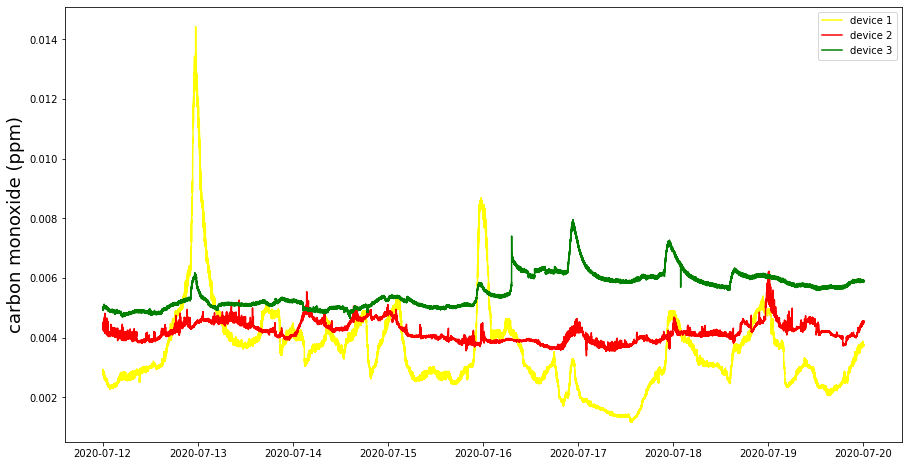

In [ ]:
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.co, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.co, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.co, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('carbon monoxide (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


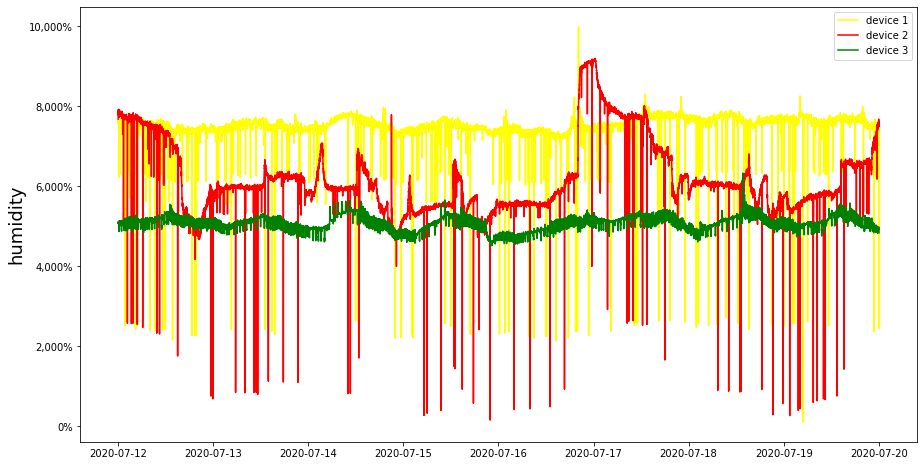

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


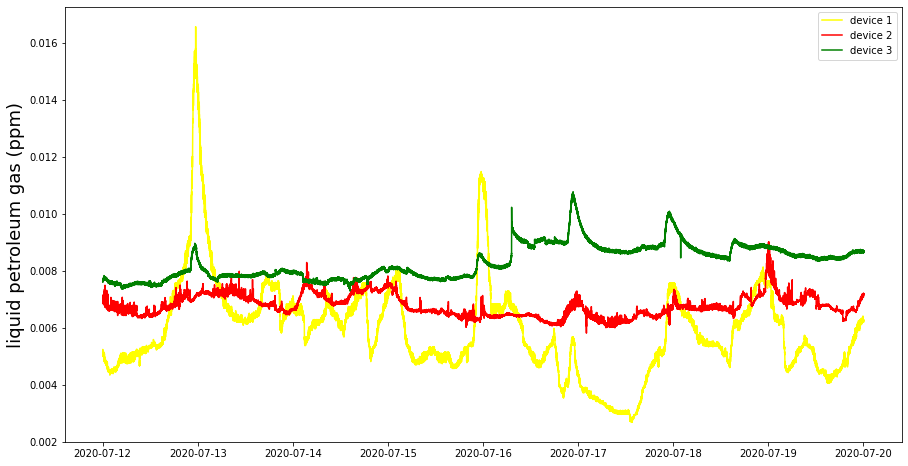

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


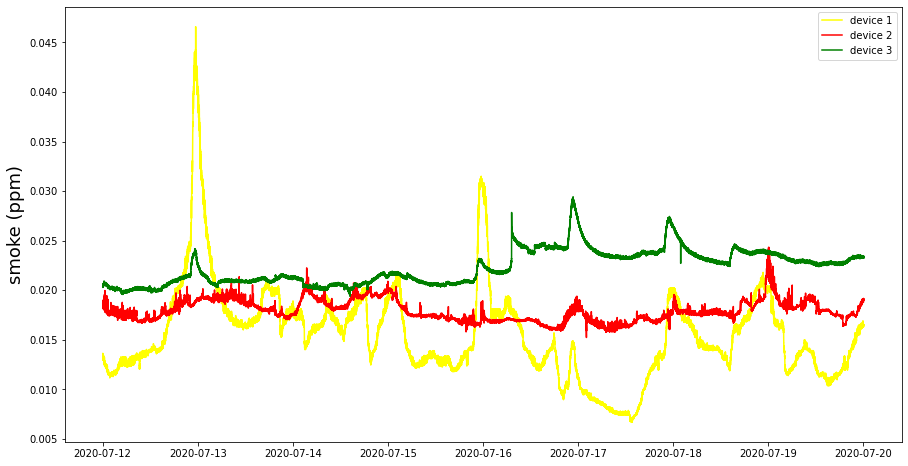

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


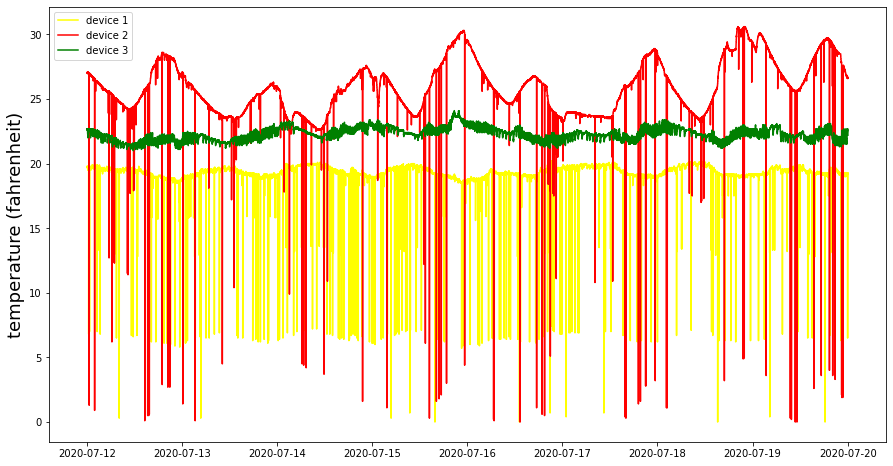

In [ ]:
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.humidity, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.humidity, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.humidity, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('humidity', fontsize = 18)
plt.legend()
plt.xlabel('')
plt.show()

plt.figure(figsize=(15,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.lpg, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.lpg, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.lpg, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('liquid petroleum gas (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.smoke, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.smoke, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.smoke, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('smoke (ppm)', fontsize = 18)
plt.xlabel('')
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
ax1 = sns.lineplot(df_1.time_stamp, df_1.temp, color = 'yellow', label = 'device 1')
ax2 = sns.lineplot(df_2.time_stamp, df_2.temp, color = 'red', label = 'device 2')
ax3 = sns.lineplot(df_3.time_stamp, df_3.temp, color = 'green', label = 'device 3')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('temperature (fahrenheit)', fontsize = 18)
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
data_device_gb = data.groupby('device')

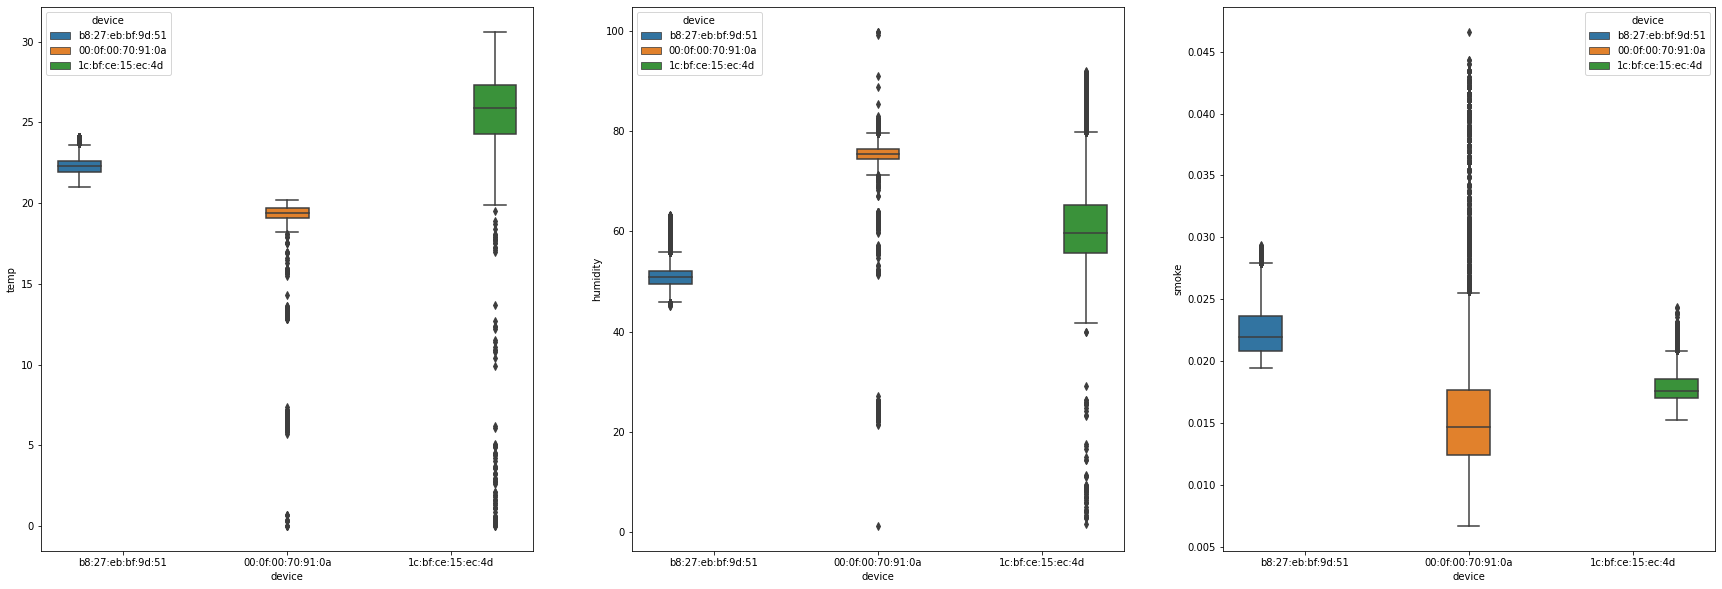

In [ ]:
subset = set(['smoke', 'humidity', 'temp'])
f, axes = plt.subplots(1,3, figsize=(30, 10))

for i, j in enumerate(subset):
    sns.boxplot(  y=data[j], x= "device", data=data, hue = 'device', orient='v' , ax=axes[i])


In [ ]:
from fbprophet import Prophet

In [ ]:
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
data['ds'] = data['datetime']
data['y'] = data['smoke']
data_device_gb = data.groupby('device')

In [ ]:
# create a dictionary of dataframes from the groupby
df_dict = {}
for i, j in enumerate(data_device_gb):
    df_dict[i] = j[1]
 

In [ ]:
df_dict[0][['ds','y']]

,ds,y
1,2020-07-12 00:01:34.735568,0.013275
7,2020-07-12 00:01:46.869076,0.013628
15,2020-07-12 00:02:02.785732,0.013509
20,2020-07-12 00:02:11.476377,0.013628
23,2020-07-12 00:02:15.289087,0.013275
...,...,...
405169,2020-07-20 00:03:16.329782,0.016437
405172,2020-07-20 00:03:20.684223,0.016437
405175,2020-07-20 00:03:25.039890,0.016437
405179,2020-07-20 00:03:33.162015,0.016437


In [ ]:
len(df_dict)

3

In [ ]:
m = Prophet()

prophet_dict = {}
for i in df_dict:
    prophet_dict[i] = m.fit(df_dict[i][['ds','y']])
    m = Prophet()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [63]:
future_dict = {}
for i in prophet_dict:
    m = prophet_dict[i]
    future_dict[i] = m.make_future_dataframe(periods=0, freq='H')

In [65]:
fcst_dict = {}
for i in future_dict:
    m = prophet_dict[i]
    fcst_dict[i] = m.predict(future_dict[i])

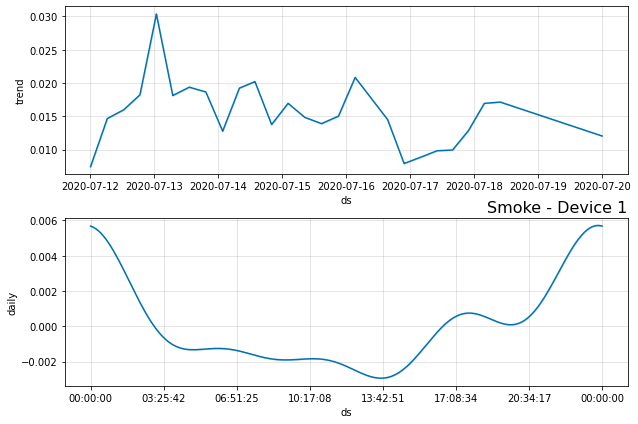

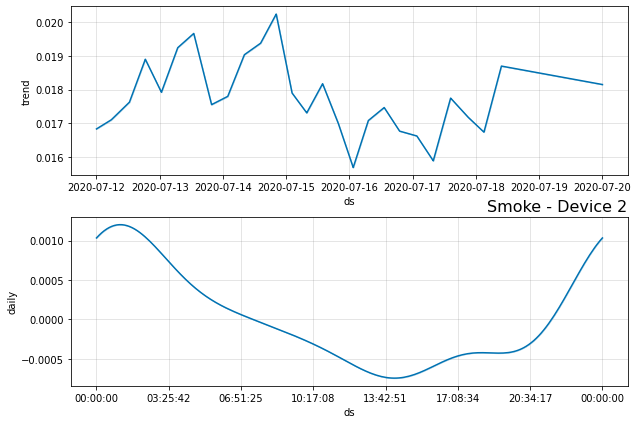

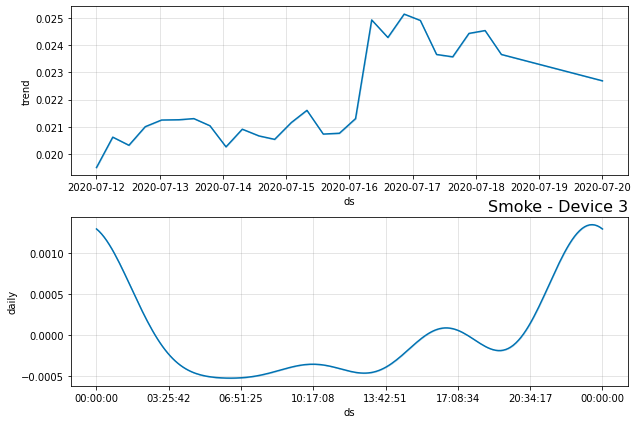

In [66]:
for i in fcst_dict:
    m = prophet_dict[i]
    fig = m.plot_components(fcst_dict[i])
    ax = fig.gca()
    ax.set_title("Smoke - Device {}".format(i+1), size=16, loc = 'right')
#fig = m.plot_components(fcst)

In [67]:
data['y'] = data['co']

In [78]:
df_dict1 = {}
for i, j in enumerate(data_device_gb):
    df_dict1[i] = j[1]

In [79]:
df_dict1[0][['ds','y']]

,ds,y
1,2020-07-12 00:01:34.735568,0.002840
7,2020-07-12 00:01:46.869076,0.002938
15,2020-07-12 00:02:02.785732,0.002905
20,2020-07-12 00:02:11.476377,0.002938
23,2020-07-12 00:02:15.289087,0.002840
...,...,...
405169,2020-07-20 00:03:16.329782,0.003745
405172,2020-07-20 00:03:20.684223,0.003745
405175,2020-07-20 00:03:25.039890,0.003745
405179,2020-07-20 00:03:33.162015,0.003745


In [80]:
m = Prophet()

prophet_dict1 = {}
for i in df_dict1:
    prophet_dict1[i] = m.fit(df_dict1[i][['ds','y']])
    m = Prophet()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [81]:
future_dict1 = {}
for i in prophet_dict1:
    m = prophet_dict1[i]
    future_dict1[i] = m.make_future_dataframe(periods=0, freq='H')

In [82]:
fcst_dict1 = {}
for i in future_dict1:
    m = prophet_dict1[i]
    fcst_dict1[i] = m.predict(future_dict1[i])

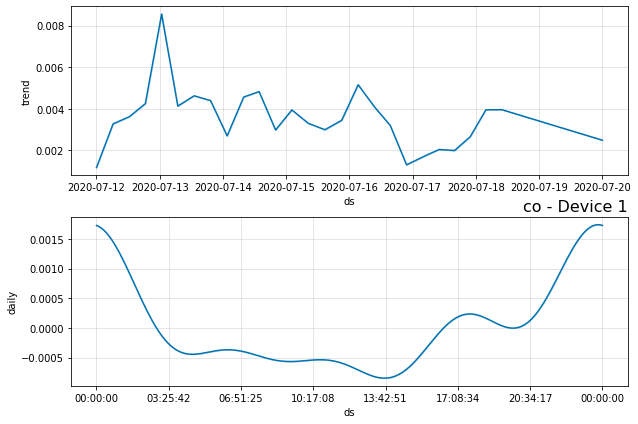

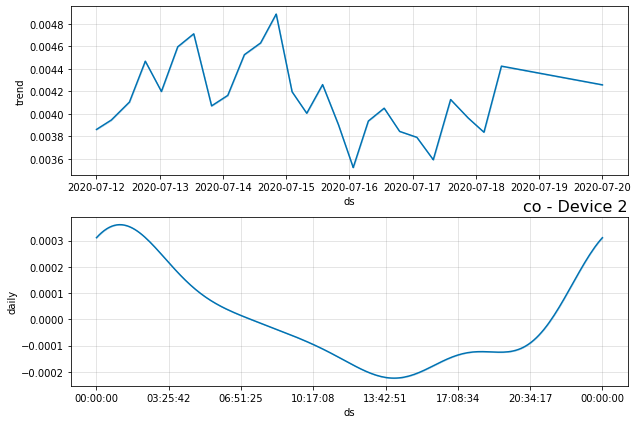

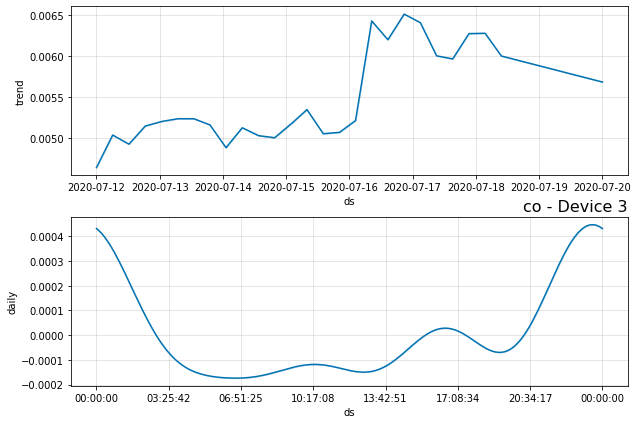

In [83]:
for i in fcst_dict1:
    m = prophet_dict1[i]
    fig = m.plot_components(fcst_dict1[i])
    ax = fig.gca()
    ax.set_title("co - Device {}".format(i+1), size=16, loc = 'right')
#fig = m.plot_components(fcst)

In [14]:
df_1.head()

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570
7,1,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:01:46.869076,2020-07-12 00:01:46,2020-07-12 00:01:46.869076014
15,1,0.002905,75.800003,False,0.005199,False,0.013509,19.700001,0,0,2020-07-12 00:02:02.785732,2020-07-12 00:02:02,2020-07-12 00:02:02.785731792
20,1,0.002938,75.800003,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:02:11.476377,2020-07-12 00:02:11,2020-07-12 00:02:11.476376534
23,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:02:15.289087,2020-07-12 00:02:15,2020-07-12 00:02:15.289086580


In [109]:
df_11=df_1.groupby('datetime')

In [116]:
df_1['datetime'][1]

Timestamp('2020-07-12 00:01:34.735568')

In [114]:
df_11.count()

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,string_time,time_stamp
datetime,,,,,,,,,,,,
2020-07-12 00:01:34.735568,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-12 00:01:46.869076,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-12 00:02:02.785732,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-12 00:02:11.476377,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-12 00:02:15.289087,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-20 00:03:16.329782,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-20 00:03:20.684223,1,1,1,1,1,1,1,1,1,1,1,1
2020-07-20 00:03:25.039890,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
df1=df_1[['co','humidity','lpg','smoke','temp']]

In [17]:
df1.head()

,co,humidity,lpg,smoke,temp
1,0.002840,76.000000,0.005114,0.013275,19.700001
7,0.002938,76.000000,0.005241,0.013628,19.700001
15,0.002905,75.800003,0.005199,0.013509,19.700001
20,0.002938,75.800003,0.005241,0.013628,19.700001
23,0.002840,76.000000,0.005114,0.013275,19.700001


In [22]:
dev1=df1

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [19]:
names=df1.columns
x = df1[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

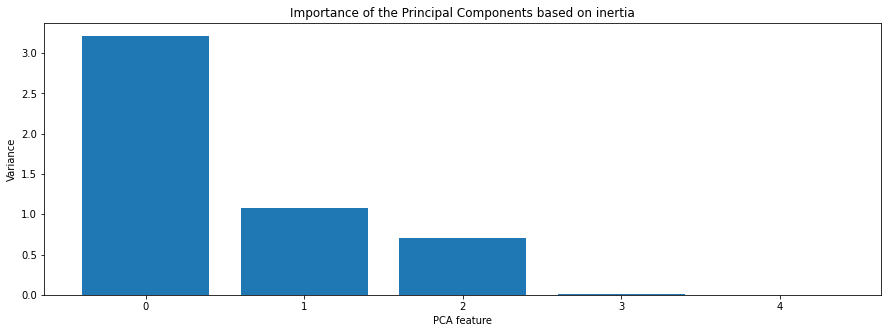

In [20]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [23]:
df1['pc1']=pd.Series(principalDf['pc1'].values, index=df1.index)
df1['pc2']=pd.Series(principalDf['pc2'].values, index=df1.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df1.head()

,co,humidity,lpg,smoke,temp,pc1,pc2
1,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179
7,0.002938,76.000000,0.005241,0.013628,19.700001,-0.588032,-0.277178
15,0.002905,75.800003,0.005199,0.013509,19.700001,-0.389143,-0.298200
20,0.002938,75.800003,0.005241,0.013628,19.700001,-0.389143,-0.298200
23,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179


In [25]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.328389364102387e-16


In [26]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

3.686697356357956e-16


In [149]:

# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  0.00013666621346897573


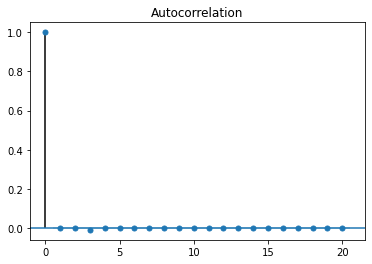

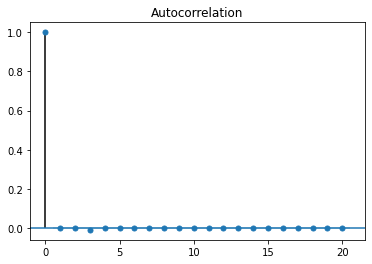

In [150]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [151]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -4.4621675770215757e-07


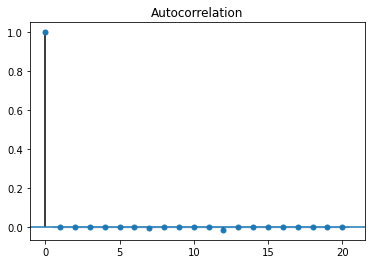

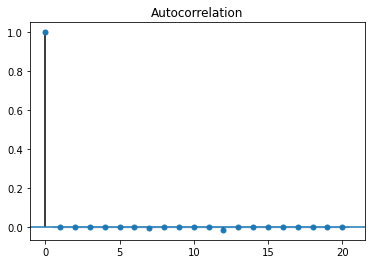

In [152]:

# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [27]:

# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df1['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df1['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [28]:
lower_pc1, upper_pc1

(-4.364968833824673, 4.324856612104863)

In [29]:
lower_pc2, upper_pc2

(-1.0302821090349221, 0.9780125512236475)

In [30]:
df1['anomaly_pc1'] = ((df1['pc1']>upper_pc1) | (df1['pc1']<lower_pc1)).astype('int')
df1['anomaly_pc2'] = ((df1['pc2']>upper_pc2) | (df1['pc2']<lower_pc2)).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df1['anomaly_pc1'].value_counts()

0    111305
1       510
Name: anomaly_pc1, dtype: int64

In [32]:
df1['anomaly_pc2'].value_counts()

0    111390
1       425
Name: anomaly_pc2, dtype: int64

In [33]:
outliers_pc1 = df1.loc[(df1['pc1']>upper_pc1) | (df1['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df1.loc[(df1['pc2']>upper_pc2) | (df1['pc2']<lower_pc2), 'pc2']

In [181]:
outliers_pc1.head()

582     13.057096
897     13.695889
3689    50.029993
5557    12.978743
6527    18.879980
Name: pc1, dtype: float64

In [160]:
len(outliers_pc1)/len(df1)

0.004561105397308054

In [161]:
len(outliers_pc2)/len(df1)

0.0038009211644233778

In [289]:
df1.head()

,co,humidity,lpg,smoke,temp,pc1,pc2,anomaly_pc1,anomaly_pc2,anomaly1,anomaly2,anomaly11
1,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179,0,0,0,0,0
7,0.002938,76.000000,0.005241,0.013628,19.700001,-0.588032,-0.277178,0,0,0,0,0
15,0.002905,75.800003,0.005199,0.013509,19.700001,-0.389143,-0.298200,0,0,0,0,0
20,0.002938,75.800003,0.005241,0.013628,19.700001,-0.389143,-0.298200,0,0,0,0,0
23,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179,0,0,0,0,0


In [290]:
dev1=df1[['co','humidity']].reset_index()

In [291]:
dev1=dev1.drop(['index'],axis=1)

In [292]:
dev1.head()

,co,humidity
0,0.002840,76.000000
1,0.002938,76.000000
2,0.002905,75.800003
3,0.002938,75.800003
4,0.002840,76.000000


In [293]:
dev11=df1[['pc1','pc2']].reset_index()

In [294]:
#dev11.reset_index(inplace=True)
dev11=dev11[['pc1','pc2']]
dev11.head()

,pc1,pc2
0,-0.588032,-0.277179
1,-0.588032,-0.277178
2,-0.389143,-0.298200
3,-0.389143,-0.298200
4,-0.588032,-0.277179


In [295]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dev11.values)
labels = kmeans.predict(dev11.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

In [297]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=3, random_state=42)
kmeans1.fit(dev1.values)
labels1 = kmeans1.predict(dev1.values)
unique_elements1, counts_elements1 = np.unique(labels1, return_counts=True)
clusters1 = np.asarray((unique_elements1, counts_elements1))

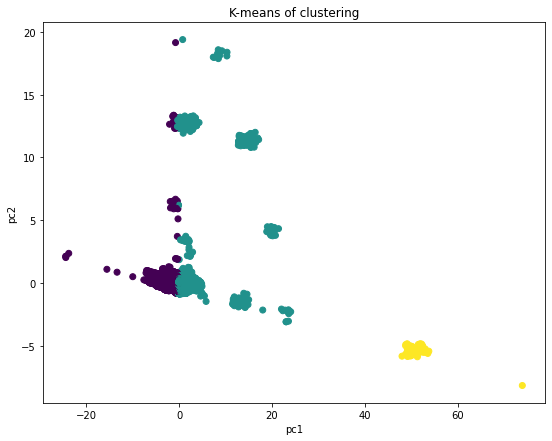

In [187]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(dev11['pc1'], dev11['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

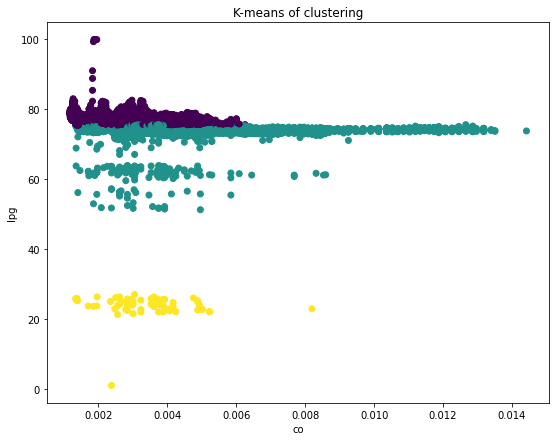

In [265]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(dev1['co'], dev1['humidity'], c=labels)
_ = plt.xlabel('co')
_ = plt.ylabel('lpg')
_ = plt.title('K-means of clustering')
plt.show()

In [298]:

# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [300]:
# Assume that 2% of the entire data set are anomalies 
outliers_fraction = 0.02
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(dev11, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
dev11['anomaly1'] = (distance >= threshold).astype(int)

In [301]:
# Assume that 2% of the entire data set are anomalies 
outliers_fraction1 = 0.02
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance1 = getDistanceByPoint(dev1, kmeans1)
# number of observations that equate to the 2% of the entire data set
number_of_outliers1 = int(outliers_fraction1*len(distance1))
# Take the minimum of the largest 2% of the distances as the threshold
threshold1 = distance1.nlargest(number_of_outliers1).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
dev1['anomaly1'] = (distance1 >= threshold).astype(int)

In [302]:
dev1.head()

,co,humidity,anomaly1
0,0.002840,76.000000,0
1,0.002938,76.000000,0
2,0.002905,75.800003,0
3,0.002938,75.800003,0
4,0.002840,76.000000,0


In [303]:
dev11.head()

,pc1,pc2,anomaly1
0,-0.588032,-0.277179,0
1,-0.588032,-0.277178,0
2,-0.389143,-0.298200,0
3,-0.389143,-0.298200,0
4,-0.588032,-0.277179,0


In [304]:
dev11['anomaly1'].value_counts()

0    109576
1      2239
Name: anomaly1, dtype: int64

In [305]:
dev1['anomaly1'].value_counts()

0    110086
1      1729
Name: anomaly1, dtype: int64

In [306]:
df_1['anomaly1']=dev11['anomaly1']
df_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp,anomaly1,anomaly2,anomaly11
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570,0.0,0.0,0.0
7,1,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:01:46.869076,2020-07-12 00:01:46,2020-07-12 00:01:46.869076014,0.0,0.0,0.0
15,1,0.002905,75.800003,False,0.005199,False,0.013509,19.700001,0,0,2020-07-12 00:02:02.785732,2020-07-12 00:02:02,2020-07-12 00:02:02.785731792,0.0,0.0,0.0
20,1,0.002938,75.800003,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:02:11.476377,2020-07-12 00:02:11,2020-07-12 00:02:11.476376534,0.0,0.0,0.0
23,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:02:15.289087,2020-07-12 00:02:15,2020-07-12 00:02:15.289086580,0.0,0.0,0.0


In [307]:
df_1['anomaly11']=dev1['anomaly1']
df_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp,anomaly1,anomaly2,anomaly11
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570,0.0,0.0,0.0
7,1,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:01:46.869076,2020-07-12 00:01:46,2020-07-12 00:01:46.869076014,0.0,0.0,0.0
15,1,0.002905,75.800003,False,0.005199,False,0.013509,19.700001,0,0,2020-07-12 00:02:02.785732,2020-07-12 00:02:02,2020-07-12 00:02:02.785731792,0.0,0.0,0.0
20,1,0.002938,75.800003,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:02:11.476377,2020-07-12 00:02:11,2020-07-12 00:02:11.476376534,0.0,0.0,0.0
23,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:02:15.289087,2020-07-12 00:02:15,2020-07-12 00:02:15.289086580,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


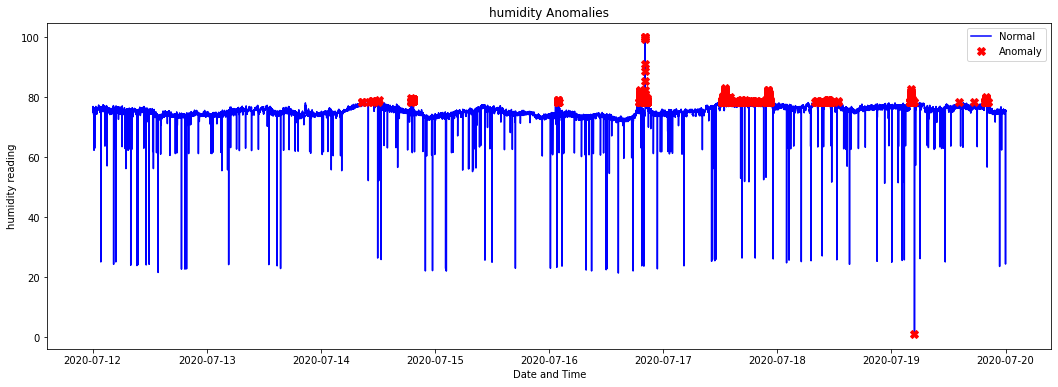

In [308]:
df1['anomaly11'] = pd.Series(dev1['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly11'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['humidity'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['humidity'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('humidity reading')
_ = plt.title('humidity Anomalies')
_ = plt.legend(loc='best')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


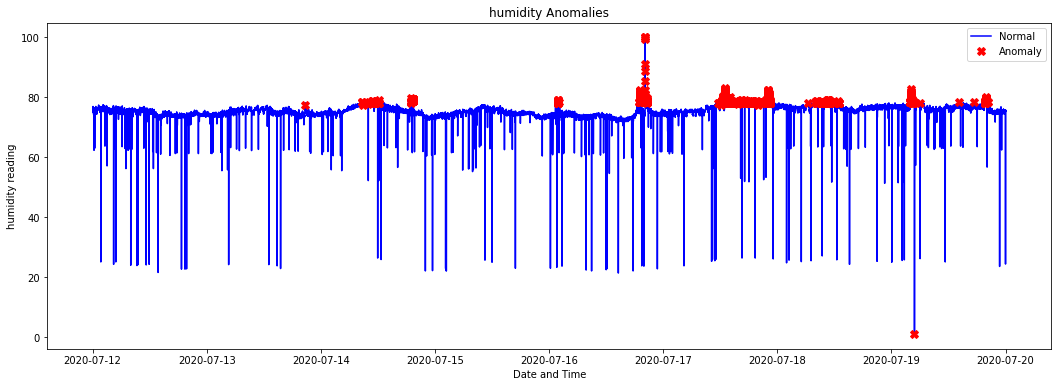

In [309]:
df1['anomaly1'] = pd.Series(dev11['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['humidity'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['humidity'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('humidity reading')
_ = plt.title('humidity Anomalies')
_ = plt.legend(loc='best')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


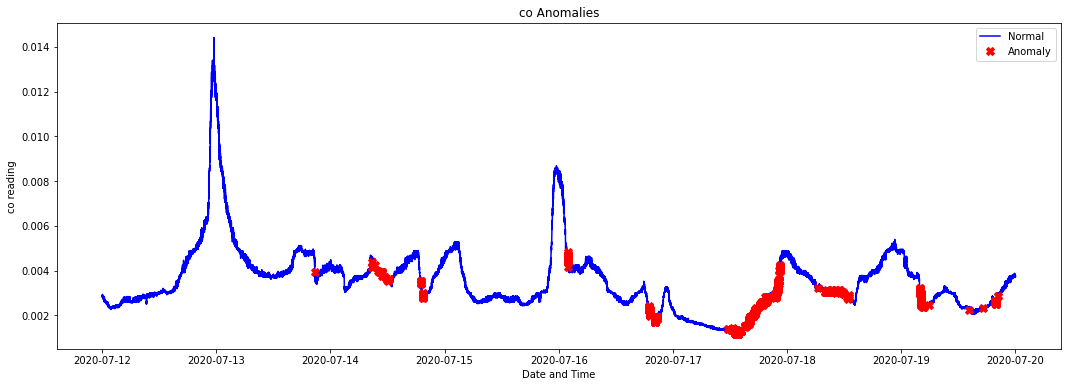

In [310]:
df1['anomaly1'] = pd.Series(dev11['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['co'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['co'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('co reading')
_ = plt.title('co Anomalies')
_ = plt.legend(loc='best')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


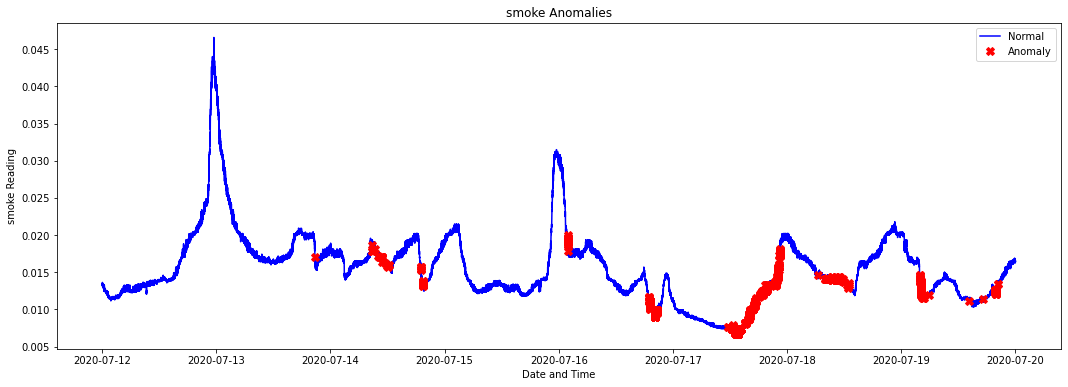

In [311]:
df1['anomaly1'] = pd.Series(dev11['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['smoke'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['smoke'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('smoke Reading')
_ = plt.title('smoke Anomalies')
_ = plt.legend(loc='best')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


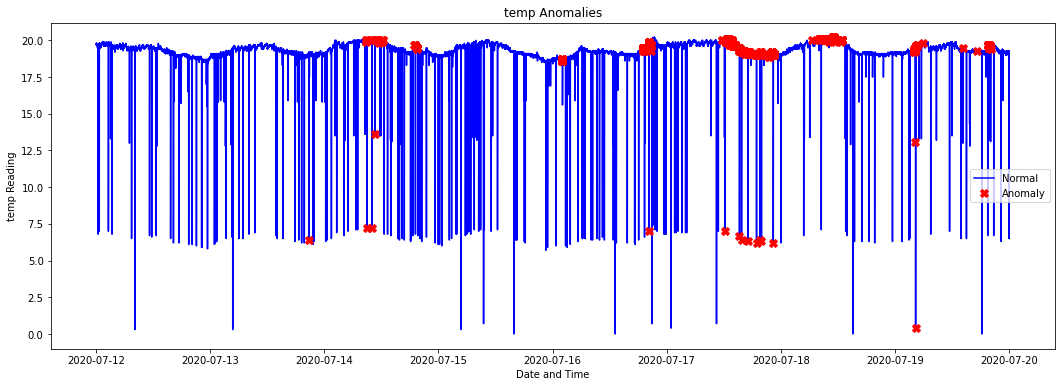

In [312]:
df1['anomaly1'] = pd.Series(dev11['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['temp'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['temp'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('temp Reading')
_ = plt.title('temp Anomalies')
_ = plt.legend(loc='best')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


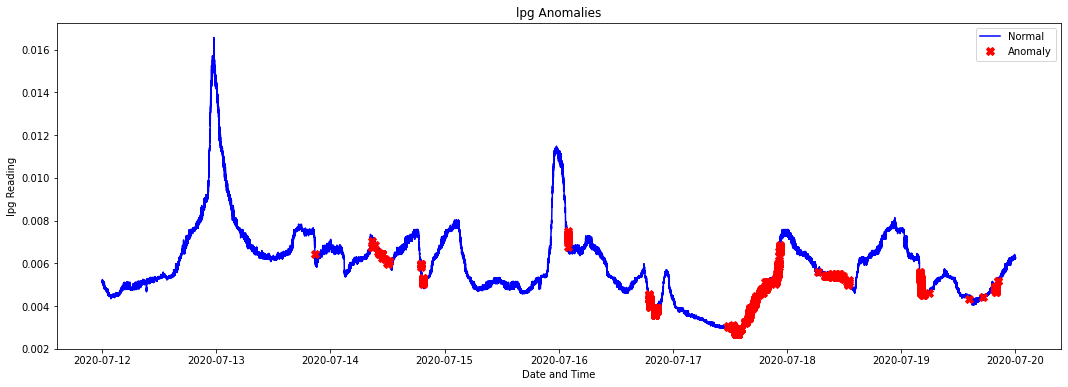

In [313]:
df1['anomaly1'] = pd.Series(dev11['anomaly1'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['lpg'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['lpg'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('lpg Reading')
_ = plt.title('lpg Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
dev11=dev11[['co','humidity']]

In [353]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 2% of the entire data set are anomalies 
outliers_fraction = 0.02
model =  IsolationForest(contamination=outliers_fraction)
model.fit(dev11.values) 
dev11['anomaly2'] = pd.Series(model.predict(dev11.values))

In [355]:
dev11['anomaly2']=dev11['anomaly2'].replace([1,-1], [0,1])

In [356]:
dev11['anomaly2'].value_counts()

0    109583
1      2232
Name: anomaly2, dtype: int64

In [357]:
df_1['anomaly2']=dev11['anomaly2']
df_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp,anomaly1,anomaly2,anomaly11
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570,0.0,0.0,0.0
7,1,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:01:46.869076,2020-07-12 00:01:46,2020-07-12 00:01:46.869076014,0.0,0.0,0.0
15,1,0.002905,75.800003,False,0.005199,False,0.013509,19.700001,0,0,2020-07-12 00:02:02.785732,2020-07-12 00:02:02,2020-07-12 00:02:02.785731792,0.0,0.0,0.0
20,1,0.002938,75.800003,False,0.005241,False,0.013628,19.700001,0,0,2020-07-12 00:02:11.476377,2020-07-12 00:02:11,2020-07-12 00:02:11.476376534,0.0,0.0,0.0
23,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:02:15.289087,2020-07-12 00:02:15,2020-07-12 00:02:15.289086580,0.0,0.0,0.0


In [349]:
df_1['light'].value_counts()

False    108207
True       3608
Name: light, dtype: int64

In [321]:
df_1['motion'].value_counts()

False    111812
True          3
Name: motion, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


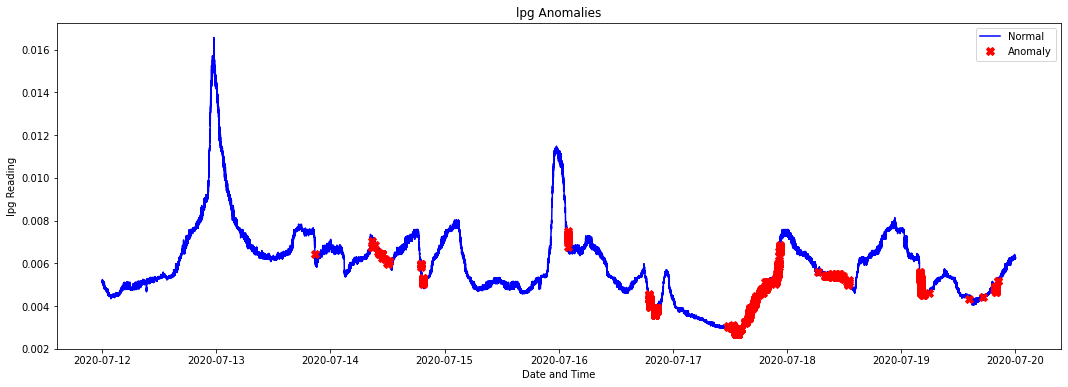

In [358]:
df1['anomaly2'] = pd.Series(dev11['anomaly2'].values, index=df1.index)
a = df_1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_1.time_stamp,df1['lpg'], color='blue', label='Normal')
_ = plt.plot(a.time_stamp,a['lpg'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('lpg Reading')
_ = plt.title('lpg Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [359]:
df1.head()

,co,humidity,lpg,smoke,temp,pc1,pc2,anomaly_pc1,anomaly_pc2,anomaly1,anomaly2,anomaly11
1,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179,0,0,0,0,0
7,0.002938,76.000000,0.005241,0.013628,19.700001,-0.588032,-0.277178,0,0,0,0,0
15,0.002905,75.800003,0.005199,0.013509,19.700001,-0.389143,-0.298200,0,0,0,0,0
20,0.002938,75.800003,0.005241,0.013628,19.700001,-0.389143,-0.298200,0,0,0,0,0
23,0.002840,76.000000,0.005114,0.013275,19.700001,-0.588032,-0.277179,0,0,0,0,0


In [360]:
df1['anomaly2'].value_counts()

0    109583
1      2232
Name: anomaly2, dtype: int64

In [363]:
len(df1[(df1['anomaly2']==1) & (df1['anomaly1']==1)])

1975

In [392]:
def Anomaly(device,data):
  df = data[data.device == device]
  dev=df[['co','humidity']].reset_index()
  dev=dev.drop(['index'],axis=1)

  from sklearn.cluster import KMeans

  kmeans = KMeans(n_clusters=3, random_state=42) 
  kmeans.fit(dev.values)
  labels = kmeans.predict(dev.values)
  unique_elements, counts_elements = np.unique(labels, return_counts=True)
  clusters = np.asarray((unique_elements, counts_elements))

  plt.figure(figsize=(9,7))
  plt.scatter(dev['co'], dev['humidity'], c=labels)
  plt.xlabel('co')
  plt.ylabel('lpg')
  plt.title('K-means of clustering')
  plt.show()

  # Write a function that calculates distance between each point and the centroid of the closest cluster
  def getDistanceByPoint(data, model):
    distance = []
    for i in range(len(data)):
      Xa = np.array(data.loc[i])
      Xb = model.cluster_centers_[model.labels_[i]-1]
      distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

  # Assume that 2% of the entire data set are anomalies (can try with you own values and check accurcy for each case)
  outliers_fraction = 0.02
  # get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
  distance = getDistanceByPoint(dev, kmeans)
  # number of observations that equate to the 2% of the entire data set
  number_of_outliers = int(outliers_fraction*len(distance))
  # Take the minimum of the largest 2% of the distances as the threshold
  threshold = distance.nlargest(number_of_outliers).min()
  # anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
  dev['anomaly1'] = (distance >= threshold).astype(int)  

  df['anomaly1'] = pd.Series(dev['anomaly1'].values, index=df.index)
  a = df[df['anomaly1'] == 1] #anomaly
  plt.figure(figsize=(18,6))
  plt.plot(df.time_stamp,df['co'], color='blue', label='Normal')
  plt.plot(a.time_stamp,a['co'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
  plt.xlabel('Date and Time')
  plt.ylabel('CO Reading')
  plt.title('CO Anomalies')
  plt.legend(loc='best')
  plt.show();

  a = df[df['anomaly1'] == 1] #anomaly
  plt.figure(figsize=(18,6))
  plt.plot(df.time_stamp,df['humidity'], color='blue', label='Normal')
  plt.plot(a.time_stamp,a['humidity'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
  plt.xlabel('Date and Time')
  plt.ylabel('Humidity Reading')
  plt.title('Humidity Anomalies')
  plt.legend(loc='best')
  plt.show();
  
  dev=df[['co','humidity']].reset_index()
  dev=dev.drop(['index'],axis=1)

  # Import IsolationForest
  from sklearn.ensemble import IsolationForest
  # Assume that 2% of the entire data set are anomalies 
  outliers_fraction = 0.02
  model =  IsolationForest(contamination=outliers_fraction)
  model.fit(dev.values) 
  dev['anomaly2'] = pd.Series(model.predict(dev.values))

  dev['anomaly2']=dev['anomaly2'].replace([1,-1], [0,1])
  df['anomaly2'] = pd.Series(dev['anomaly2'].values, index=df.index)

  a = df[df['anomaly2'] == 1] #anomaly
  plt.figure(figsize=(18,6))
  plt.plot(df.time_stamp,df['co'], color='blue', label='Normal')
  plt.plot(a.time_stamp,a['co'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
  plt.xlabel('Date and Time')
  plt.ylabel('CO Reading')
  plt.title('CO Anomalies')
  plt.legend(loc='best')
  plt.show();

  a = df[df['anomaly2'] == 1] #anomaly
  plt.figure(figsize=(18,6))
  plt.plot(df.time_stamp,df['humidity'], color='blue', label='Normal')
  plt.plot(a.time_stamp,a['humidity'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
  plt.xlabel('Date and Time')
  plt.ylabel('Humidity Reading')
  plt.title('Humidity Anomalies')
  plt.legend(loc='best')
  plt.show();

  df=df.drop(['light_int','motion_int','datetime','time_stamp'],axis=1)

  return df

In [393]:
data.head()

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int,datetime,string_time,time_stamp
0,3,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,2020-07-12 00:01:34.385974,2020-07-12 00:01:34,2020-07-12 00:01:34.385974407
1,1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735567570
2,3,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,2020-07-12 00:01:38.073573,2020-07-12 00:01:38,2020-07-12 00:01:38.073572636
3,2,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1,0,2020-07-12 00:01:39.589146,2020-07-12 00:01:39,2020-07-12 00:01:39.589146137
4,3,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,2020-07-12 00:01:41.761235,2020-07-12 00:01:41,2020-07-12 00:01:41.761234999


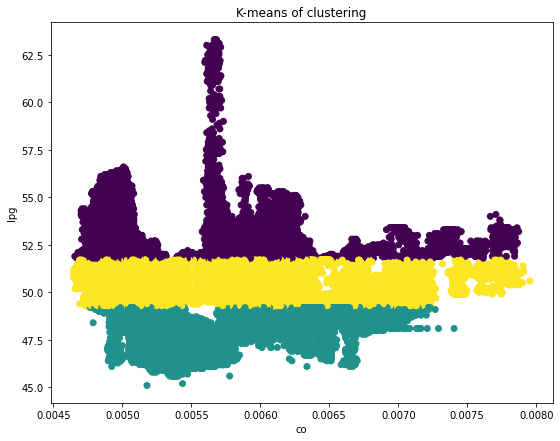

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


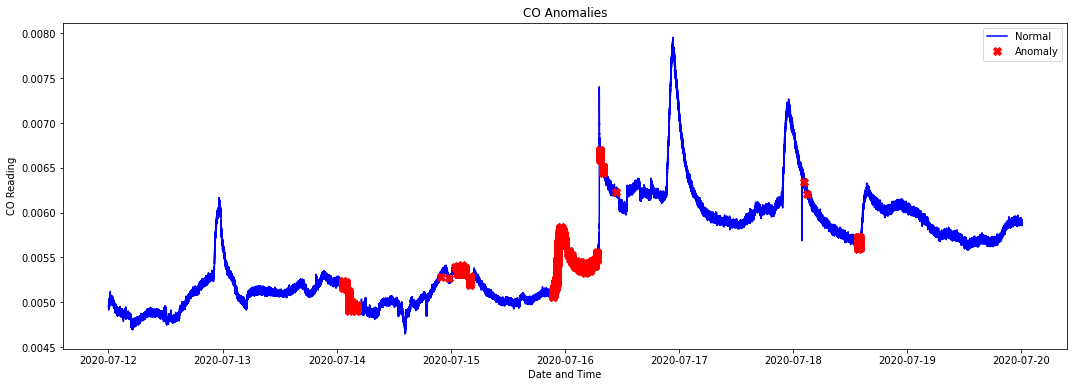

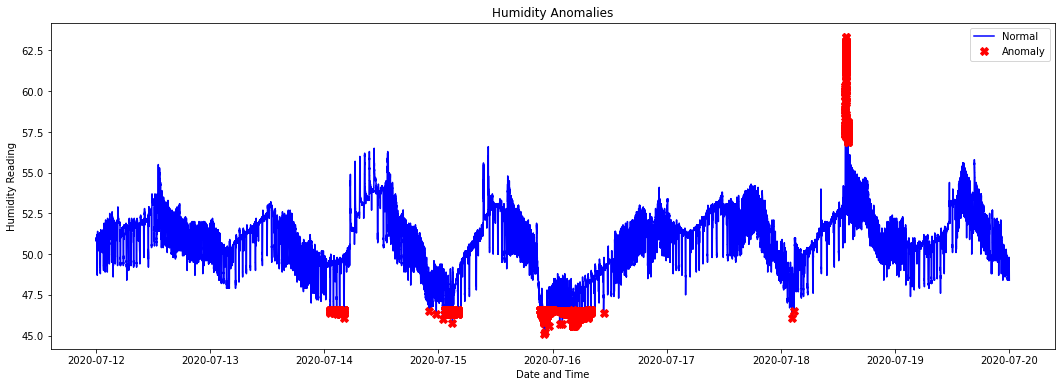

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


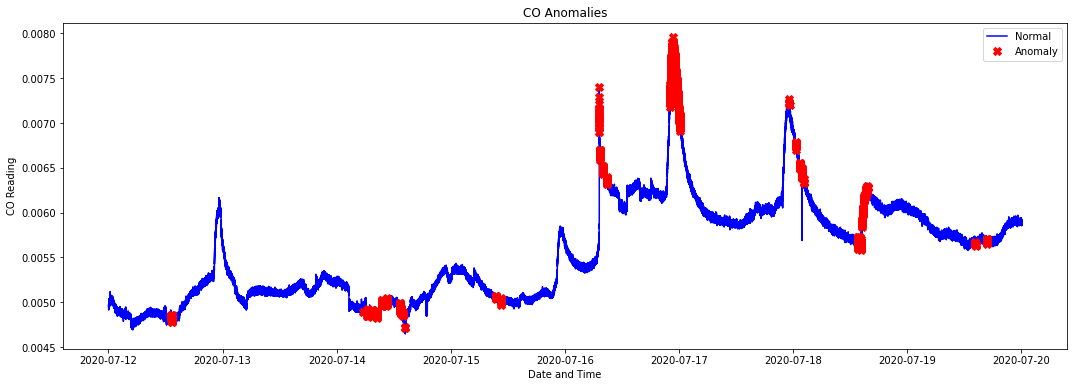

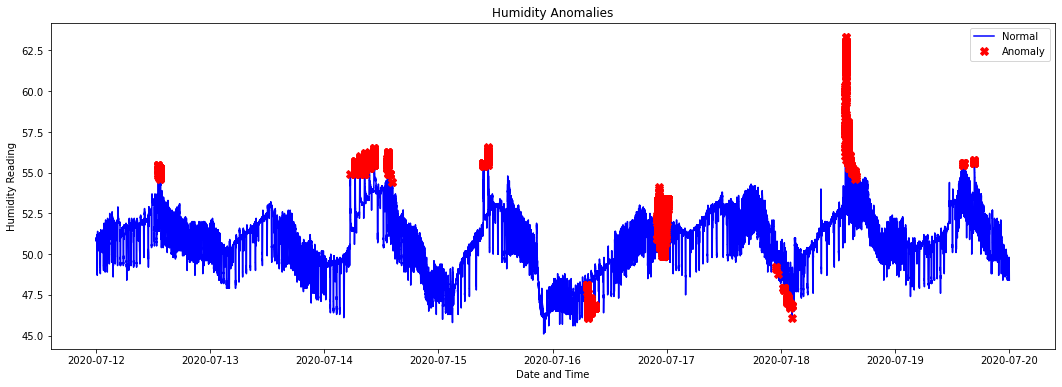

,device,co,humidity,light,lpg,motion,smoke,temp,string_time,anomaly1,anomaly2
0,3,0.004956,51.0,False,0.007651,False,0.020411,22.7,2020-07-12 00:01:34,0,0
2,3,0.004976,50.9,False,0.007673,False,0.020475,22.6,2020-07-12 00:01:38,0,0
4,3,0.004967,50.9,False,0.007664,False,0.020448,22.6,2020-07-12 00:01:41,0,0
6,3,0.004976,50.9,False,0.007673,False,0.020475,22.6,2020-07-12 00:01:45,0,0
9,3,0.004970,50.9,False,0.007667,False,0.020457,22.6,2020-07-12 00:01:49,0,0
...,...,...,...,...,...,...,...,...,...,...,...
405173,3,0.005901,48.4,False,0.008681,False,0.023359,22.3,2020-07-20 00:03:22,0,0
405176,3,0.005909,48.4,False,0.008689,False,0.023382,22.3,2020-07-20 00:03:26,0,0
405177,3,0.005877,48.5,False,0.008654,False,0.023284,22.3,2020-07-20 00:03:29,0,0
405180,3,0.005882,48.5,False,0.008660,False,0.023301,22.2,2020-07-20 00:03:33,0,0


In [394]:
Anomaly(3,data)